# Regression discontinuity with sci-kit learn models

In [1]:
import pandas as pd
import pathlib
import arviz as az

In [2]:
az.style.use("arviz-darkgrid")

## Load data

In [3]:
rd_data_path = (
    pathlib.Path.cwd().parents[1] / "causalpy" / "data" / "regression_discontinuity.csv"
)
data = pd.read_csv(rd_data_path)

## Linear, main-effects model

In [4]:
from causalpy.skl_experiments import RegressionDiscontinuity
from sklearn.linear_model import LinearRegression

result = RegressionDiscontinuity(
    data,
    formula="y ~ 1 + x + treated",
    prediction_model=LinearRegression(),
    treatment_threshold=0.5,
)

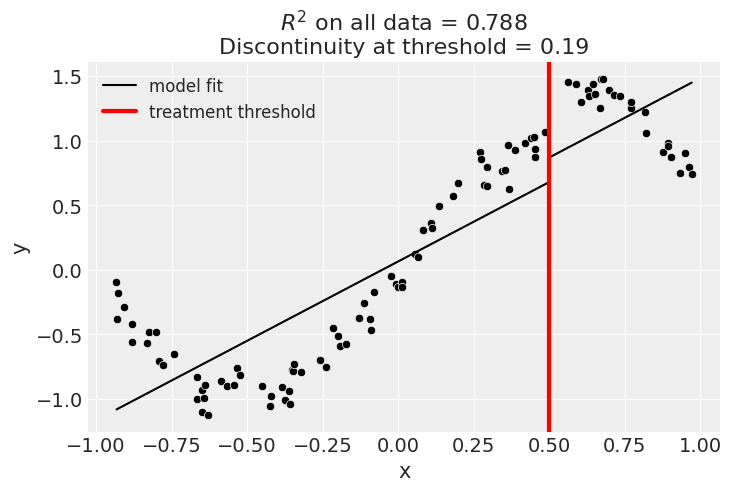

In [5]:
fig, ax = result.plot();

## Linear, main-effects and interaction model

In [6]:
result = RegressionDiscontinuity(
    data,
    formula="y ~ 1 + x + treated + x:treated",
    prediction_model=LinearRegression(),
    treatment_threshold=0.5,
)

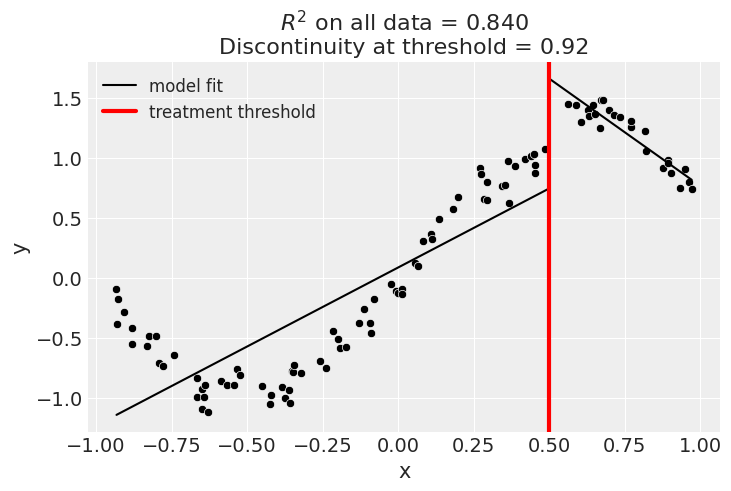

In [7]:
result.plot();

## Using Gaussian Processes

In [8]:
from causalpy.skl_experiments import RegressionDiscontinuity
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

kernel = 1.0 * ExpSineSquared(1.0, 5.0) + WhiteKernel(1e-1)
result = RegressionDiscontinuity(
    data,
    formula="y ~ 1 + x + treated",
    prediction_model=GaussianProcessRegressor(kernel=kernel),
    treatment_threshold=0.5,
)

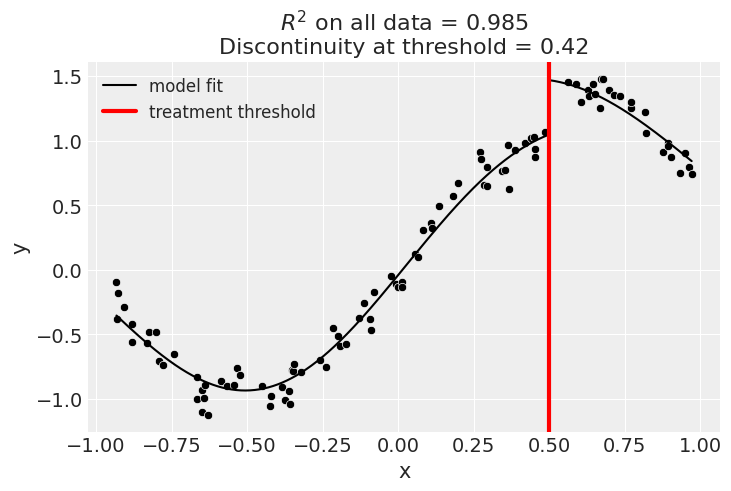

In [9]:
fig, ax = result.plot();

## Using basis splines

In [10]:
from causalpy.skl_experiments import RegressionDiscontinuity
from sklearn.linear_model import LinearRegression

# use basis splines
result = RegressionDiscontinuity(
    data,
    formula="y ~ 1 + bs(x, df=6) + treated",
    prediction_model=LinearRegression(),
    treatment_threshold=0.5,
)

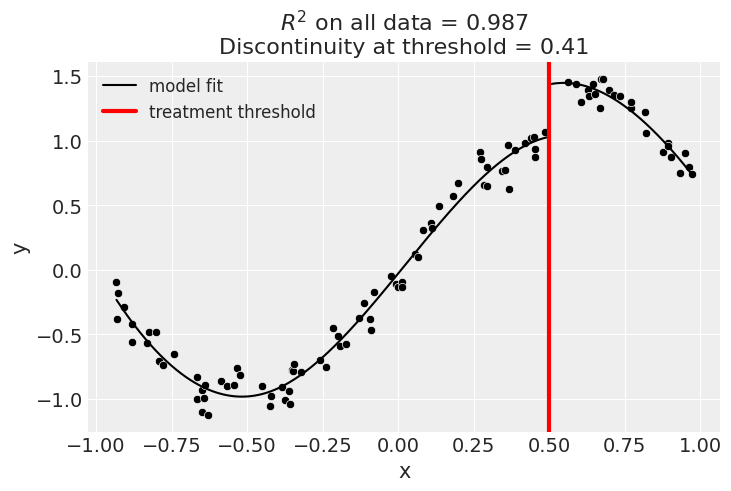

In [11]:
fig, ax = result.plot()